# Import

In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


# Création du 

In [2]:
def metrique(path):
    files = os.listdir(path);
    contenu = [];
    for file in files:
        if file.endswith('.json'):
            openFile = open(path+file, "r");
            contenu.append(json.loads(openFile.read())["Image"]);
            openFile.close();
    return contenu;

In [3]:
chemin = os.getcwd()+"/small_dataset_train/train/";
contenu = [];
if not os.path.isdir(chemin):
    print('Rajouter le dossier train dans le dossier courant :) ! ');
else :
    contenu = metrique(chemin);

# Traitement Image pour faire du gradiant

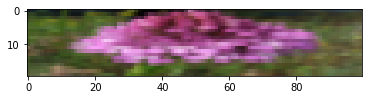

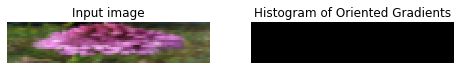

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure

import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


#Récupération de l'image
image = mpimg.imread(os.getcwd()+"/small_dataset_train/train/281.jpg")

#Transformaation de l'image dans un format utilisable
if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
    image = (image * 255).astype(np.uint8)
    
image = resize(image, (20,100),
                       anti_aliasing=True)

#Affichage Image
plt.imshow(image)
#plt.show()

#Début traitement pour avoir les gradiant
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()




Définition de la fonction donnant l histogramme des gradiants

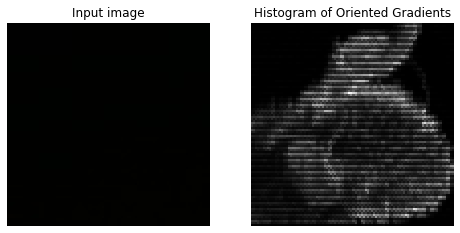

In [5]:

# import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure


def transformeGradiant(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/small_dataset_train/train/"+nomImage)

    #Transformaation de l'image dans un format utilisable
    if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)

    #Début traitement pour avoir les gradiant
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(5, 5), visualize=True, multichannel=True)


    hog_image = resize(hog_image, (100,100),
                       anti_aliasing=True)
    return hog_image;

def afficherFleurEtGradiant(nomImage,hog_image):
    image = mpimg.imread(os.getcwd()+"/Descente_Gradiant/trainResize/"+nomImage)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show();

imgTest=transformeGradiant("23.jpg")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(mpimg.imread(os.getcwd()+"/small_dataset_train/train/23.jpg"), cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(imgTest, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(imgTest, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Transformation des images en gradiant avec sauvegarde

In [8]:
def creationFichierGradiant(chemin):
    chemin = os.getcwd()+chemin;
    files = os.listdir(chemin);
    
    dossierEnreg=os.getcwd()+"/Descente_Gradiant/Image_Gradiant/";
    for file in files:
        grad=transformeGradiant(file);
        nom=file.split(".")[0];
        np.savetxt(dossierEnreg+nom+".gra",grad);
    return;

creationFichierGradiant("/Descente_Gradiant/trainResize/");


# Création dataframe

In [9]:
def creationDicoSpecies():
    chemin = os.getcwd()+"/small_dataset_train/train/";
    dico={}
    files = os.listdir(chemin);
    i=0;
    for file in files:
        if file.endswith('.json') and i<3000:
            openFile = open(chemin+file, "r");
            fileSansExt=file.split(".");
            espece=json.loads(openFile.read())["Image"]["Species"];
            openFile.close();
            dico[fileSansExt[0]]=espece;
            i=i+1;
    return dico;

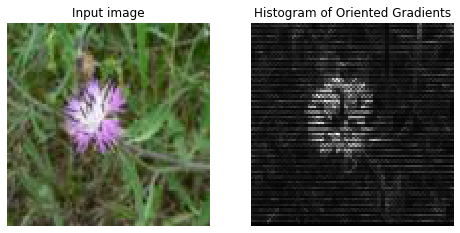

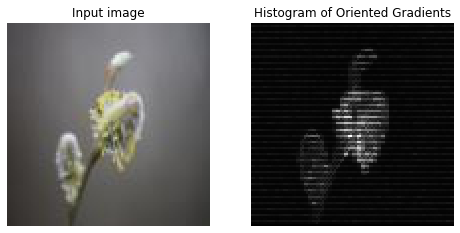

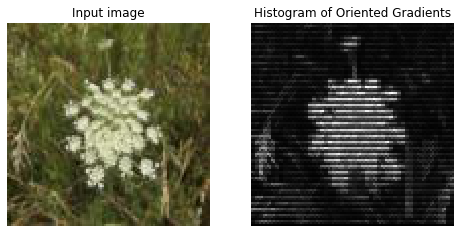

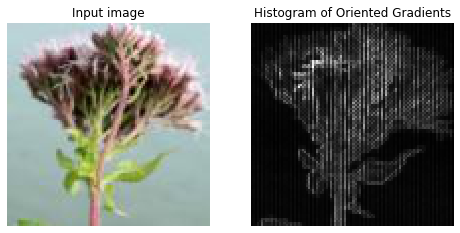

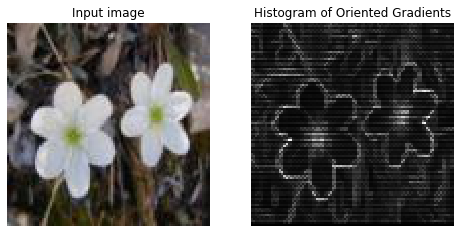

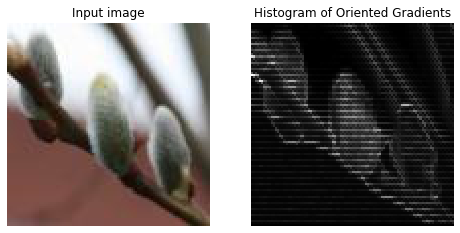

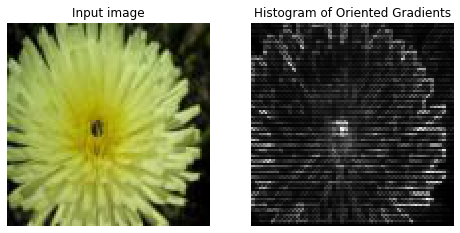

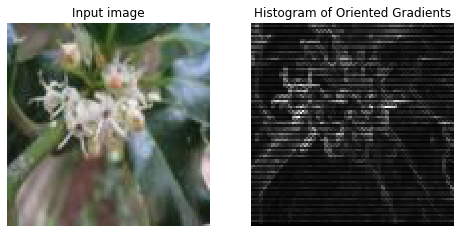

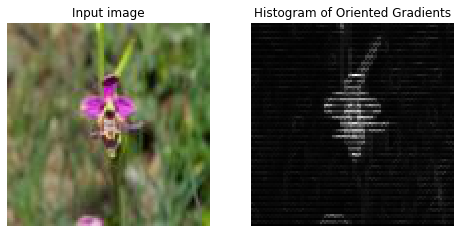

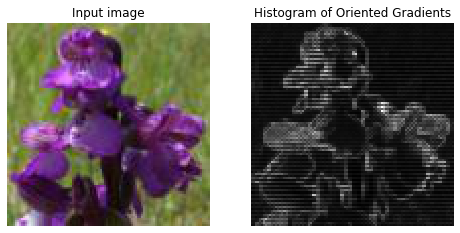

c est bon ca marche


In [16]:

#Création d'un dico clé:fichier JSON valeur: Nom espece
dicoSpe=creationDicoSpecies();
#display(dicoSpe);
#Création liste
df = pd.DataFrame();
df['Gradiant']=1;
df['Espèce']=1;
i=0;
cheminGrad=os.getcwd()+"/Descente_Gradiant/Image_Gradiant/";
#select30percent(dicoSpe);
for clé in dicoSpe:
    hog_image=np.loadtxt(cheminGrad+clé+".gra");
    if i<10:
        afficherFleurEtGradiant(clé+".jpg",hog_image);
    i=i+1;
    #print(i , " : " , clé);
    df.loc[len(df)]=[hog_image,dicoSpe[clé]];
    
df.head();
df.to_csv(os.getcwd()+"/Descente_Gradiant/dataFrameGradiant.csv",sep='\t',index=False)
display(df.loc(1))
#afficherFleurEtGradiant("23.jpg",df['Gradiant'].get(1));
print("c est bon ca marche")

# Utilisation DataFrame et Début Appretissage

In [17]:
df = pd.read_csv(os.getcwd()+"/Descente_Gradiant/dataFrameGradiant.csv",sep='\t');

#display(df.head());



,Gradiant,Espèce
0,[[5.93514849e-01 3.73939730e-01 5.33219628e-01...,Centaurea aspera L.
1,[[0.09231617 0.10088889 0.10188087 ... 0.13546...,Salix caprea L.
2,[[0.2477249 0.29941452 0.38639396 ... 0.33541...,Daucus carota L.
3,[[0.14293616 0.19404201 0.0875377 ... 0.07875...,Eupatorium cannabinum L.
4,[[2.74162713e-01 5.31988408e-01 3.22990397e-01...,Anemone hepatica L.
